# Introduction

There are 183412 rows in the dataset with 16 features. I select few features and want to explorate data basic on them. Here are few questions that I will ansewer.

# Data wrangling:
1. Delete useless columns('start_time', 'end_time', 'start_station_id','start_station_name','start_station_latitude', 'start_station_longitude','end_station_id','end_station_name','end_station_latitude','end_station_longitude', 'bike_share_for_all_trip'])
2. Drop rows with null values
3. Conver datatype into int
4. Add duration_mins & age & age group columns
5. Delete duration_mins longer than 88 mins in duration_mins column
6. Delete age group older than 80 years old in age_group column

#Questions:

1.What is the average trip length?

2.What proportion of rides are longer than 10 minutes?

3.Which type of user takes longer rides on average?

4.What is the average trip length for Subscribers or Customers? 

5.Which age of people use sharing bikes most?

# Visualization
Univariate Exploration¶
1. Average trip length of each user type
2. Average trip length of each age group
3. Number of users in each age group

Bivariate Exploration
1. How does the trip duration distribution vary between customers and subscribers?
2. How does the trip duration distribution vary between each age group?
3. How does the trip duration distribution vary between male and female?

Multivariate Exploration
1. Compare the correlation between "duration_mins"， "age_group" and the other features
2. Avgerage trip Duration of user type in different age group

In [39]:
#Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [40]:
#Read CSV
bike = pd.read_csv('./fordgobike-tripdata.csv')

In [41]:
#Data shape
bike.shape

(183412, 16)

# Define
1. Delete useless columns('start_time', 'end_time', 'start_station_id','start_station_name','start_station_latitude', 'start_station_longitude','end_station_id','end_station_name','end_station_latitude','end_station_longitude', 'bike_share_for_all_trip'])

In [42]:
#Code
bike.columns

Index(['duration_sec', 'start_time', 'end_time', 'start_station_id',
       'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type',
       'member_birth_year', 'member_gender', 'bike_share_for_all_trip'],
      dtype='object')

In [43]:
drop_columns = ['start_time', 'end_time', 'start_station_id', 'start_station_name', \
                'start_station_latitude', 'start_station_longitude', 'end_station_id', 'end_station_name',\
       'end_station_latitude', 'end_station_longitude', 'bike_share_for_all_trip']

In [44]:
bike_clean = bike.drop(columns = drop_columns)

In [45]:
#Test
bike_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 5 columns):
duration_sec         183412 non-null int64
bike_id              183412 non-null int64
user_type            183412 non-null object
member_birth_year    175147 non-null float64
member_gender        175147 non-null object
dtypes: float64(1), int64(2), object(2)
memory usage: 7.0+ MB


# Define
2. Drop rows with null values

In [46]:
#Code
bike = bike_clean[bike_clean['member_birth_year'].notnull()]

In [47]:
bike.member_gender.unique()

array(['Male', 'Other', 'Female'], dtype=object)

In [48]:
#Test
bike.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 175147 entries, 0 to 183411
Data columns (total 5 columns):
duration_sec         175147 non-null int64
bike_id              175147 non-null int64
user_type            175147 non-null object
member_birth_year    175147 non-null float64
member_gender        175147 non-null object
dtypes: float64(1), int64(2), object(2)
memory usage: 8.0+ MB


# Define

3. Conver datatype into int

In [49]:
#Code
bike['member_birth_year'] = bike['member_birth_year'].astype(int)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [50]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 175147 entries, 0 to 183411
Data columns (total 5 columns):
duration_sec         175147 non-null int64
bike_id              175147 non-null int64
user_type            175147 non-null object
member_birth_year    175147 non-null int64
member_gender        175147 non-null object
dtypes: int64(3), object(2)
memory usage: 8.0+ MB


# Define

4. Add duration_mins & age & age group columns

In [51]:
bike['duration_mins'] = bike['duration_sec'] // 60
bike['age'] = 2019 - bike['member_birth_year']

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [52]:
def check_age(age):
    age_group = []
    for age in bike['age']:
        if age < 30:
            age_group.append('<30')
        elif age >= 30 and age <40:
            age_group.append('30-40')
        elif age >= 40 and age <50:
            age_group.append('40-50')
        elif age >= 50 and age <60:
            age_group.append('50-60')
        elif age >= 60 and age <70:
            age_group.append('60-70')
        elif age >= 70 and age <80:
            age_group.append('70-80')
        elif age >= 80 and age <90:
            age_group.append('80-90')
        elif age >= 90 and age <100:
            age_group.append('90-100')
        elif age >= 100 and age <110:
            age_group.append('100-110')
        elif age >= 110 and age <120:
            age_group.append('110-120')
        else:
            age_group.append('>120')
    return age_group


In [53]:
age_group = check_age(bike['age'])
len(age_group)

175147

In [54]:
bike['age_group'] = age_group

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


5. Delete duration_mins longer than 88 mins in duration_mins columns

In [55]:
pd.options.display.max_rows = 10000

In [56]:
a = bike.duration_mins.value_counts()
a

5       15090
4       14681
6       14365
7       13583
8       12445
3       12207
9       10957
10       9849
11       8555
2        8087
12       7478
13       6354
14       5437
15       4717
16       3944
17       3263
1        2984
18       2743
19       2266
20       1895
21       1581
22       1345
23       1150
24        955
25        802
26        732
27        592
28        554
29        494
30        459
31        407
32        360
33        315
34        310
35        255
36        238
37        222
38        216
39        193
40        181
41        158
42        153
43        131
44        127
45        100
46         88
48         70
55         65
47         65
52         64
49         64
50         63
51         52
53         52
57         51
54         51
59         49
58         48
60         45
56         45
72         32
66         30
63         29
62         29
64         27
67         27
71         25
77         25
73         24
61         24
69         22
93    

In [64]:
bike = bike.query('duration_mins <= 88')

6. Delete age group older than 80 years old in age_group column

In [94]:
bike = bike.query('age_group == ["<30", "30-40", "40-50", "50-60", "60-70", "70-80"]')

In [96]:
bike.to_csv('bike.csv')

In [97]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174127 entries, 4 to 183411
Data columns (total 8 columns):
duration_sec         174127 non-null int64
bike_id              174127 non-null int64
user_type            174127 non-null object
member_birth_year    174127 non-null int64
member_gender        174127 non-null object
duration_mins        174127 non-null int64
age                  174127 non-null int64
age_group            174127 non-null object
dtypes: int64(5), object(3)
memory usage: 12.0+ MB


# Questions

1.What is the average trip length?

In [98]:
avg_second = bike.duration_sec.mean()
avg_mins = avg_second // 60
print ('The average trip length is {} mintues.'.format(avg_mins))

The average trip length is 10.0 mintues.


2.What proportion of rides are longer than 10 minutes?

In [99]:
pro_ride_long_10 = (bike[bike['duration_mins'] > 10].count()[0] / bike.shape[0])

In [100]:
print ('The proportion of rides that longer than 10 minutes is {0:.0%}.'.format(pro_ride_long_10))

The proportion of rides that longer than 10 minutes is 34%.


3.Which type of user takes longer rides on average?

In [101]:
Cus_avg_mins = bike.groupby(['user_type']).duration_mins.mean()[0]
Sub_avg_mins = bike.groupby(['user_type']).duration_mins.mean()[1]
Cus_avg_mins,Sub_avg_mins

(15.494472920397703, 9.464941051325237)

In [102]:
print ('{} take longer rides on average than {}.'.format('Customers','Subscribers'))

Customers take longer rides on average than Subscribers.


4.What is the average trip length for Subscribers or Customers?

In [103]:
Cus_avg_mins = bike.groupby(['user_type']).duration_mins.mean()[0].round()
Sub_avg_mins = bike.groupby(['user_type']).duration_mins.mean()[1].round()
Cus_avg_mins,Sub_avg_mins

(15.0, 9.0)

In [104]:
print ('The average trip length of Customers is {} mintues and the average trip length of Subscribers {} mintues.'.format(\
                                                                                        Cus_avg_mins,Sub_avg_mins))

The average trip length of Customers is 15.0 mintues and the average trip length of Subscribers 9.0 mintues.


5.Which age of people use sharing bikes most?

In [105]:
pd.options.display.max_rows = 300

In [106]:
mode_age = bike.age.mode()[0]

In [107]:
print ('People at {} years old are the most age group use sharing bike.'.format(mode_age))

People at 31 years old are the most age group use sharing bike.


# Visualization
Univariate Exploration¶
1. Average trip length of each user type
2. Average trip length of each age group
3. Number of users in each age group

Bivariate Exploration
1. How does the trip duration distribution vary between customers and subscribers?
2. How does the trip duration distribution vary between each age group?
3. How does the trip duration distribution vary between male and female?

Multivariate Exploration
1. Compare the correlation between "duration_mins"， "age_group" and the other features
2. Avgerage trip Duration of user type in different age group

# Univariate Exploration

1. Average trip length of each user type

In [108]:
df = bike.groupby(['user_type']).duration_mins.mean().round()
df

user_type
Customer      15.0
Subscriber     9.0
Name: duration_mins, dtype: float64

Text(0, 0.5, 'Average trip length')

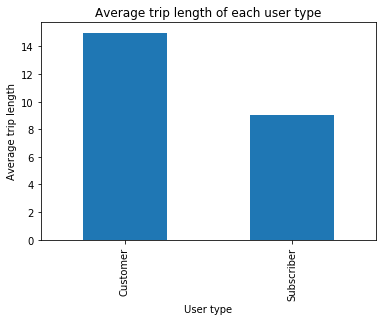

In [109]:
df.plot(kind = 'bar');
plt.title('Average trip length of each user type')
plt.xlabel('User type')
plt.ylabel('Average trip length')

2. Average trip length of each age group

In [110]:
bike.age.unique()

array([45, 60, 36, 30, 31, 27, 23, 26, 29, 38, 44, 41, 35, 28, 22, 33, 19,
       37, 24, 39, 46, 34, 48, 47, 40, 52, 21, 25, 42, 20, 32, 50, 56, 43,
       55, 54, 58, 51, 53, 57, 65, 61, 59, 49, 63, 62, 74, 67, 71, 68, 78,
       69, 70, 66, 64, 73, 72, 76, 77, 18, 75])

In [111]:
age_group_length = bike.groupby(['age_group']).duration_mins.mean().round()

In [112]:
df = age_group_length.loc[["<30", "30-40", "40-50", "50-60", "60-70", "70-80"]]
df

age_group
<30      10.0
30-40    10.0
40-50    10.0
50-60    11.0
60-70    12.0
70-80    11.0
Name: duration_mins, dtype: float64

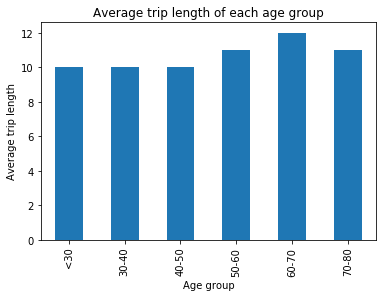

In [113]:
df.plot(kind = 'bar');
plt.title('Average trip length of each age group');
plt.xlabel('Age group');
plt.ylabel('Average trip length');

 The average trip length of people at 60-70 years old are 12 mintues.

3. Number of users in each age group

In [114]:
num_age_group = bike.age_group.value_counts()
num_age_group

30-40    68763
<30      65134
40-50    24253
50-60    12044
60-70     3465
70-80      468
Name: age_group, dtype: int64

In [124]:
num_age_group = num_age_group.loc[["<30", "30-40", "40-50", "50-60", "60-70", "70-80"]]
num_age_group

<30      65134
30-40    68763
40-50    24253
50-60    12044
60-70     3465
70-80      468
Name: age_group, dtype: int64

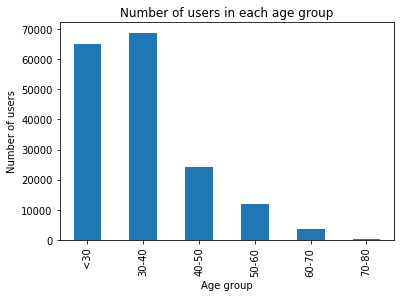

In [116]:
num_age_group.plot(kind = 'bar');
plt.title('Number of users in each age group');
plt.xlabel('Age group');
plt.ylabel('Number of users');

There are 68763 users at 30 to 40 years old which is the highest number of all.

# Bivariate Exploration

1.How does the trip duration distribution vary between customers and subscribers?

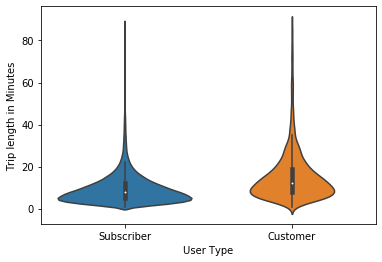

In [129]:
sb.violinplot(data=bike, x='user_type', y='duration_mins');
plt.xlabel('User Type');
plt.ylabel('Trip length in Minutes');

According to this violinplot chart, subscribers'trip duration length is much narrower than customers. It means that customers usually use rent bike for longer trips and subscribes are likely rent bike for short trips.

2.How does the trip duration distribution vary between each age group?

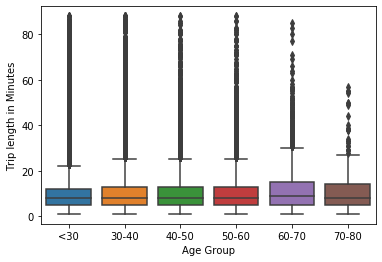

In [130]:
sb.boxplot(data=bike, x='age_group', y='duration_mins', order = ["<30", "30-40", "40-50", "50-60", "60-70", "70-80"]);
plt.xlabel('Age Group');
plt.ylabel('Trip length in Minutes');

There aren't a huge different between age groups. People at 60 to 70 years old has higher median and longer IQR.

3.How does the trip duration distribution vary between male and female?

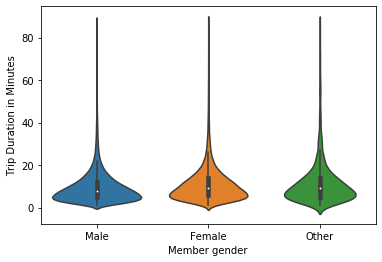

In [119]:
sb.violinplot(data=bike, x='member_gender', y='duration_mins');
plt.xlabel('Member gender');
plt.ylabel('Trip Duration in Minutes');

Male riders are likely rent bike for short trips compare to female and other.

# Multivariate Exploration

1. Compare the correlation between "duration_mins"， "age_group" and the other features

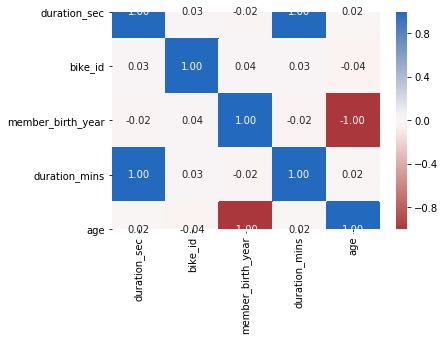

In [132]:
sb.heatmap(bike.corr(), annot = True, fmt = '.2f', cmap = 'vlag_r', center = 0);

Compare the correlation between "duration_mins"， "age_group" and the other features. Correlation between "duration_mins" and "age_group" is 0.02.

2. Avgerage trip Duration of user type in different age group

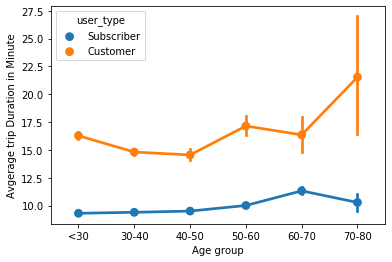

In [139]:
sb.pointplot(data=bike, x='age_group', y='duration_mins', hue='user_type', order = ["<30", "30-40", "40-50", "50-60", "60-70", "70-80"]);
plt.xlabel('Age group');
plt.ylabel('Avgerage trip Duration in Minute');

We can easily  to find changes in avgerage trip duration to age group. The avgerage trip duration is rising for subscriber as the age arises while it decreases at 60-70 age group, however, avgerage trip duration change up and down for customer.